In [51]:
from sklearn.datasets import load_boston, load_diabetes, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

0.03593813663804628


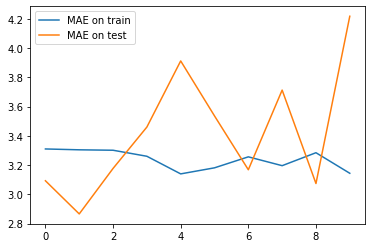

In [61]:
X, y = load_boston(return_X_y=True)
# model = Lasso()
alphas = { 'alpha': np.logspace(-3, 4, 10) }
# grid = GridSearchCV(model, alphas, scoring='neg_mean_absolute_error')
ss = ShuffleSplit(n_splits=10)
scaler = StandardScaler()
mae_train = []
mae_test = []

def magic(X, y, normalize=True, model='ridge'):
    for train_index, test_index, in ss.split(X):
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]

        if normalize:
            scaler.fit(X_train)
            X_train_norm = scaler.transform(X_train)
            X_test_norm = scaler.transform(X_test)
        else:
            X_train_norm = X_train
            X_test_norm = X_test

        if model == 'ridge':
            grid = GridSearchCV(Ridge(), alphas, scoring='neg_mean_absolute_error')
            
        elif model == 'lasso':
            grid = GridSearchCV(Lasso(), alphas, scoring='neg_mean_absolute_error')
        
        grid.fit(X_train_norm, y_train)
        y_predicted_train = grid.predict(X_train_norm)
        y_predicted_test = grid.predict(X_test_norm)
            
        mae_train.append(np.mean([np.abs(y_train[i] - y_predicted_train[i]) for i in range(len(y_train))]))
        mae_test.append(np.mean([np.abs(y_test[i] - y_predicted_test[i]) for i in range(len(y_test))]))

    plt.plot(mae_train);
    plt.plot(mae_test);
    plt.legend(labels=['MAE on train', 'MAE on test']);

    print(grid.best_estimator_.alpha)

magic(X, y, model='lasso')

In [34]:
diabetes_data = load_diabetes()
housing_data = fetch_california_housing()

diabetes_df = pd.DataFrame(diabetes_data.data)
housing_df = pd.DataFrame(housing_data.data)

diabetes_df.columns = diabetes_data.feature_names
housing_df.columns = housing_data.feature_names

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [67]:
X, y = load_diabetes(return_X_y=True)
meanX = np.mean(X, 0)
stdX = np.std(X, 0)
print(meanX, stdX)

[-3.63428493e-16  1.30834257e-16 -8.04534920e-16  1.28165452e-16
 -8.83531559e-17  1.32702421e-16 -4.57464634e-16  3.77730150e-16
 -3.83085422e-16 -3.41288202e-16] [0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]


0.001


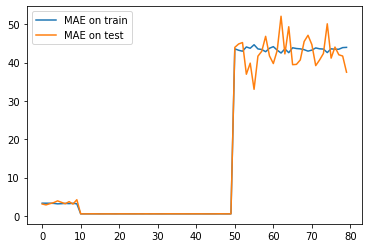

In [70]:
magic(X, y, normalize=False, model='ridge')

In [62]:
X, y = fetch_california_housing(return_X_y=True)
meanX = np.mean(X, 0)
stdX = np.std(X, 0)
print(meanX, stdX)

[ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02] [1.89977569e+00 1.25852527e+01 2.47411320e+00 4.73899376e-01
 1.13243469e+03 1.03857980e+01 2.13590065e+00 2.00348319e+00]


0.001


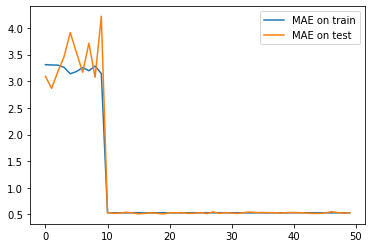

In [66]:
magic(X, y, normalize=False, model='lasso')